#Task 1: Define the Problem

#Task 2a: Install the Needed Libraries

In [118]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Task 2b: Import the Needed Libraries

#Task 3: Load the Data

In [119]:
df=pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/diamonds.csv?authuser=0')

#Task 4: Perform Data Exploratory Analysis (EDA)

In [120]:
#take a look at the type of data is in the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [121]:
df.isnull().sum()
#determining if the data contains any missing data

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

##Show the data

In [122]:
df.describe()
#Look at the statistics in the data

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##Get Data Info

In [123]:
df.head()
#it seems as though the data is about diamonds. Price of Diamonds, measurements and other features.

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


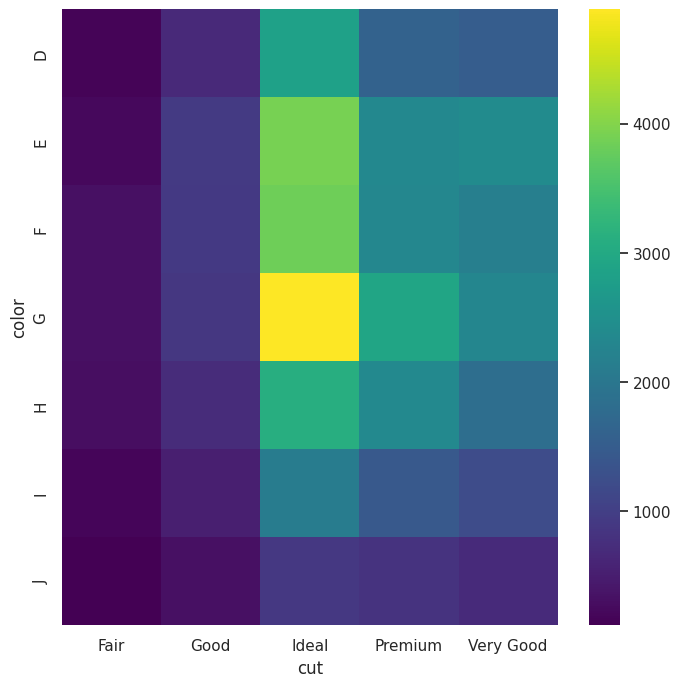

In [124]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['color'].value_counts()
    for x_label, grp in df.groupby('cut')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cut')
_ = plt.ylabel('color')

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


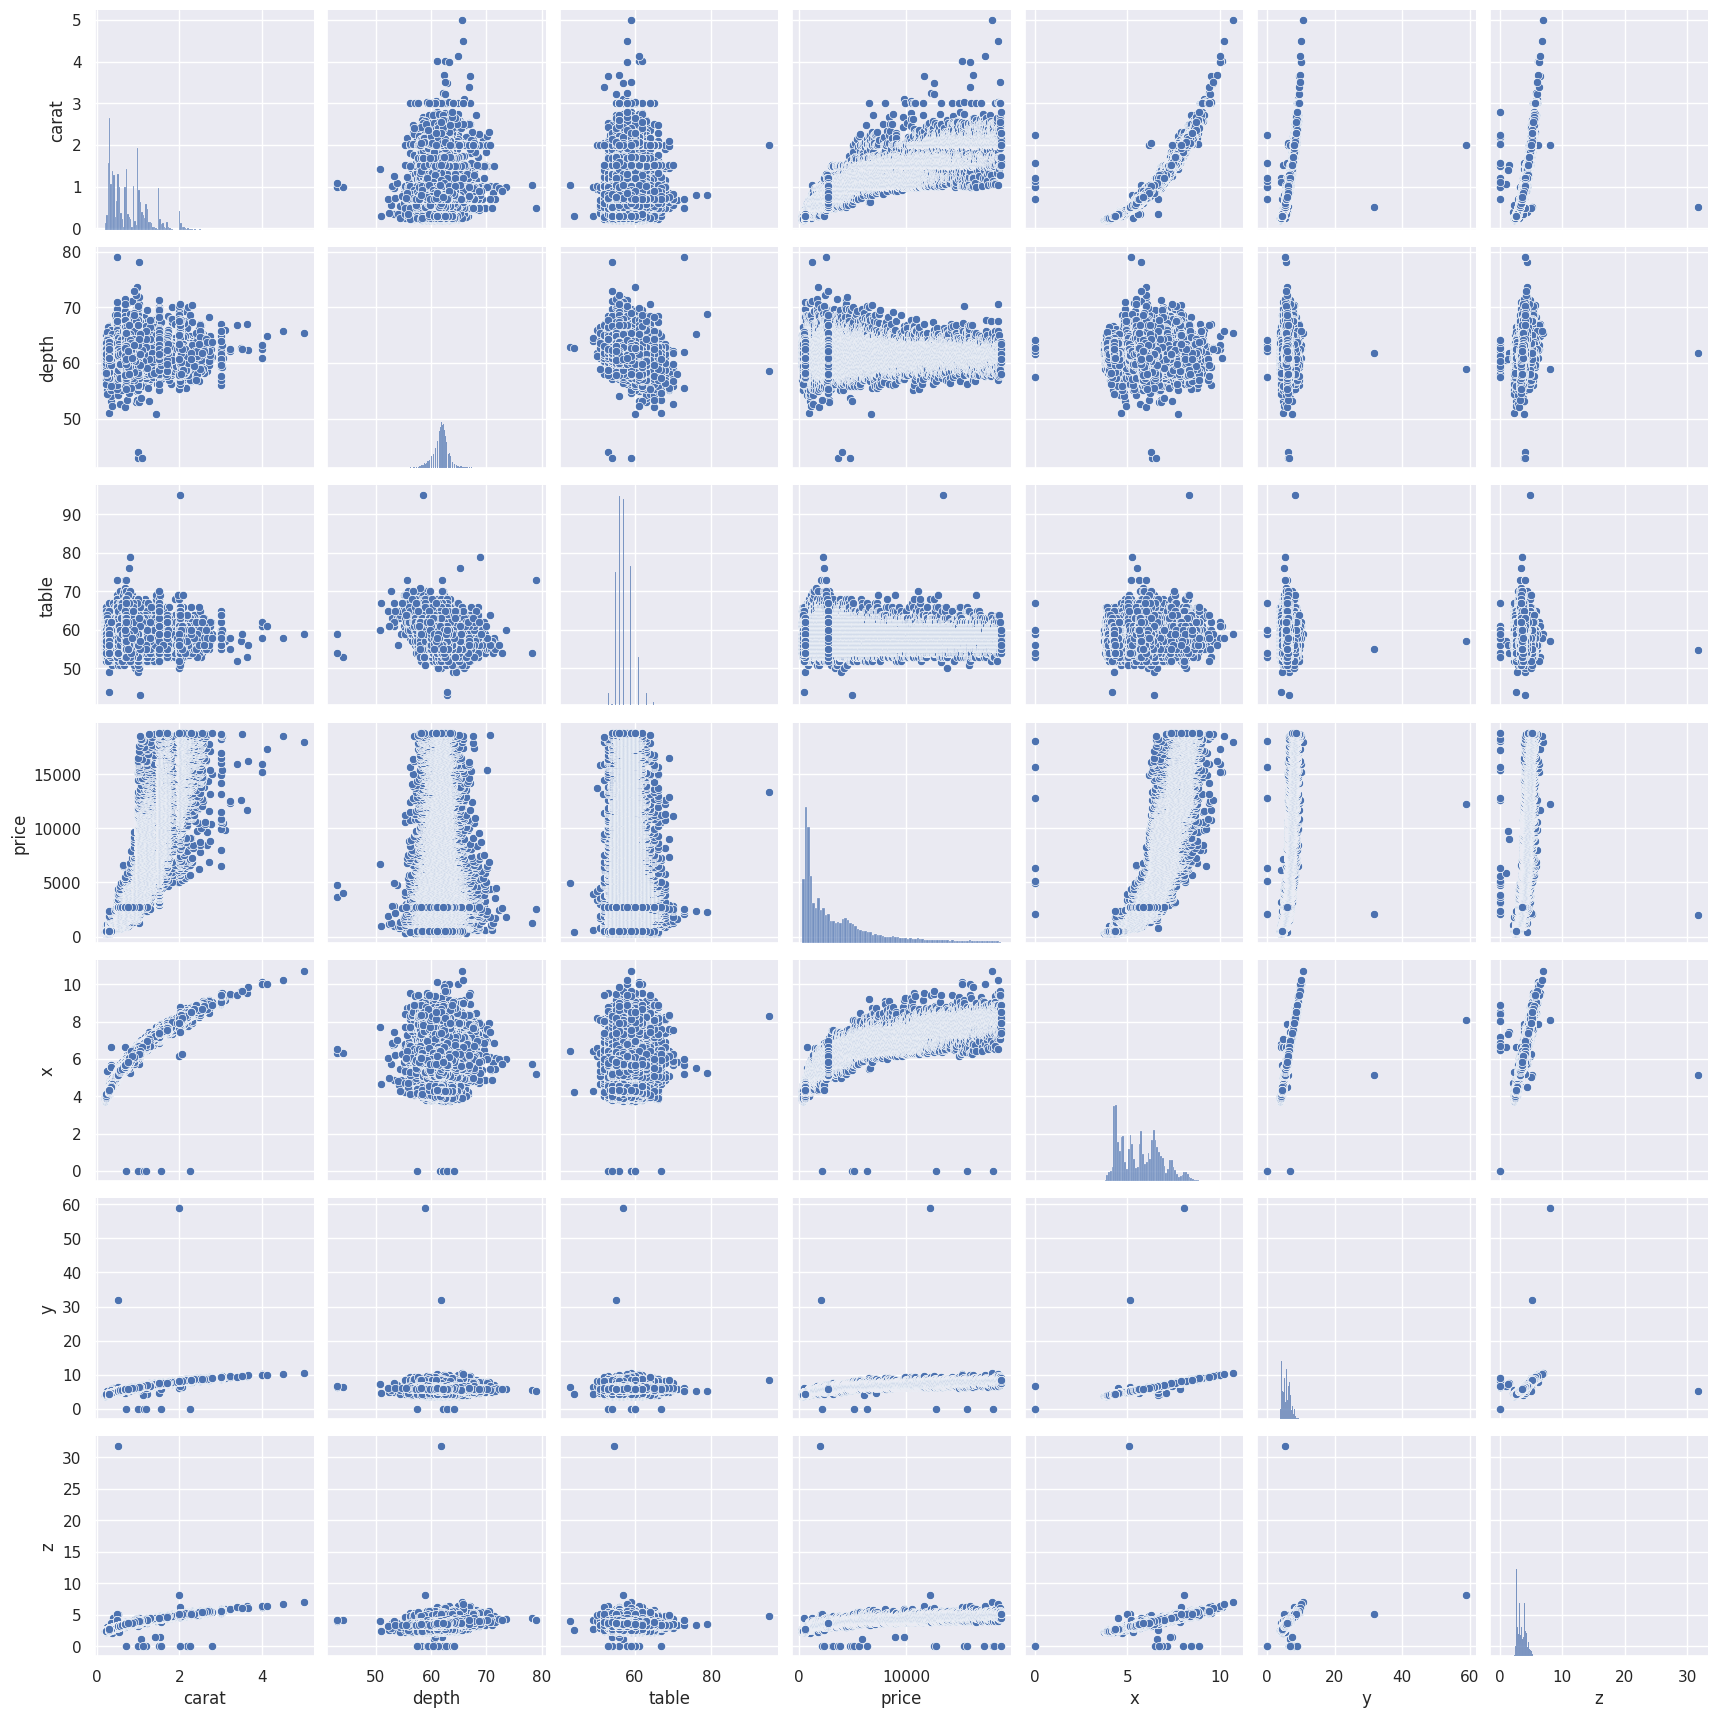

In [126]:
sns.pairplot(df)
#looking at the relationships between different columns of the data

##Find Missing Values

#Task 5: Perform Data Cleaning

In [127]:
#I wanted to view the variables in the column cut
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [128]:
#Im planning to replace the objects with numbers so the data can be transformed easier
df['cut'].replace(0, 'Ideal',inplace=True)
df['cut'].replace(1, 'Premium',inplace=True)
df['cut'].replace(2, 'Good',inplace=True)
df['cut'].replace(3, 'Very Good',inplace=True)
df['cut'].replace(4, 'Fair',inplace=True)

In [129]:
#replacing again
df.cut[df['cut']== 'Ideal']=0
df.cut[df['cut']== 'Premium']=1
df.cut[df['cut']== 'Good']=2
df.cut[df['cut']== 'Very Good']=3
df.cut[df['cut']== 'Fair']=4

<ipython-input-129-a31925cf8c07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cut[df['cut']== 'Ideal']=0
<ipython-input-129-a31925cf8c07>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cut[df['cut']== 'Premium']=1
<ipython-input-129-a31925cf8c07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.cut[df['cut']== 'Good']=2
<ipython-input-129-a31925cf8c07>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [130]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [131]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [132]:
df['color'].replace(0, 'E',inplace=True)
df['color'].replace(1, 'I',inplace=True)
df['color'].replace(2, 'J',inplace=True)
df['color'].replace(3, 'H',inplace=True)
df['color'].replace(4, 'F',inplace=True)
df['color'].replace(5, 'G',inplace=True)
df['color'].replace(6, 'D',inplace=True)

In [133]:
df.color[df['color']== 'E']= 0
df.color[df['color']== 'I']= 1
df.color[df['color']== 'J']= 2
df.color[df['color']== 'H']= 3
df.color[df['color']== 'F']= 4
df.color[df['color']== 'G']= 5
df.color[df['color']== 'D']= 6

<ipython-input-133-bff68ea375d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.color[df['color']== 'E']= 0
<ipython-input-133-bff68ea375d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.color[df['color']== 'I']= 1
<ipython-input-133-bff68ea375d5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.color[df['color']== 'J']= 2
<ipython-input-133-bff68ea375d5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [134]:
df.head()
#looking at my transformed data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,SI2,63.3,58.0,335,4.34,4.35,2.75


In [135]:
df['color'] = df['color'].astype(np.int64)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 4.1+ MB


In [137]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [138]:
df['clarity'].replace(0, 'SI2',inplace=True)
df['clarity'].replace(1, 'SI1',inplace=True)
df['clarity'].replace(2, 'VS1',inplace=True)
df['clarity'].replace(3, 'VS2',inplace=True)
df['clarity'].replace(4, 'VVS2',inplace=True)
df['clarity'].replace(5, 'VVS1',inplace=True)
df['clarity'].replace(6, 'I1',inplace=True)
df['clarity'].replace(7, 'IF',inplace=True)


In [139]:
df.clarity[df['clarity']== 'SI2']= 0
df.clarity[df['clarity']== 'SI1']= 1
df.clarity[df['clarity']== 'VS1']= 2
df.clarity[df['clarity']== 'VS2']= 3
df.clarity[df['clarity']== 'VVS2']= 4
df.clarity[df['clarity']== 'VVS1']= 5
df.clarity[df['clarity']== 'I1']= 6
df.clarity[df['clarity']== 'IF']= 7

<ipython-input-139-bf371855ece6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.clarity[df['clarity']== 'SI2']= 0
<ipython-input-139-bf371855ece6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.clarity[df['clarity']== 'SI1']= 1
<ipython-input-139-bf371855ece6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.clarity[df['clarity']== 'VS1']= 2
<ipython-input-139-bf371855ece6>:4: SettingWithCopyWarning: 
A value is trying to 

In [140]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75


#Task 6: Visualize Cleaned up Dataset

<Axes: xlabel='clarity'>

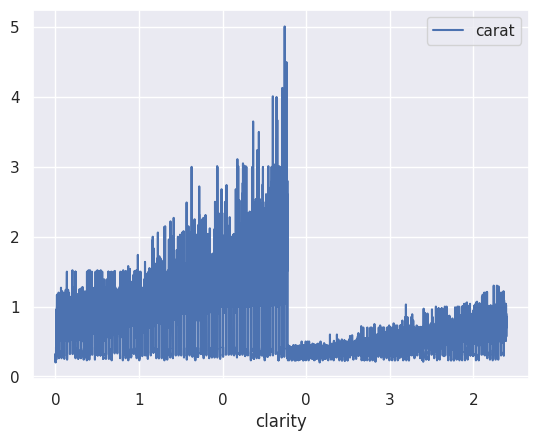

In [141]:
df.plot(x='clarity',y='carat')
#viewing the relationship between clarity and carat

#Task 7: Conceptualize the problem

In [142]:
carat= df ['carat']
price= df ['price']

In [143]:
X = np.array(carat).reshape(-1,1)
Y= np.array(price)

In [144]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

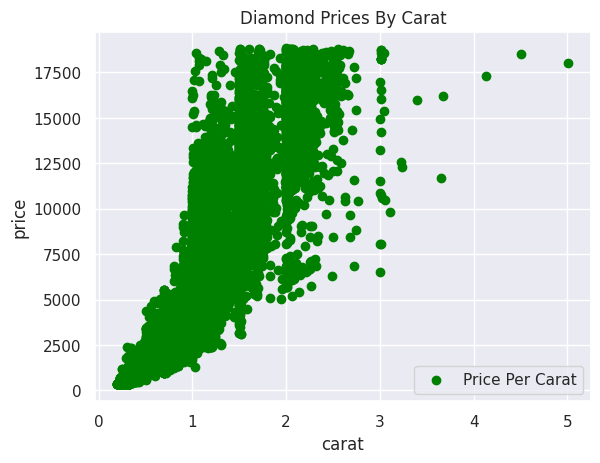

In [145]:
plt.scatter(X_train, Y_train, color = "green", label = "Price Per Carat")
plt.title("Diamond Prices By Carat")
plt.xlabel("carat")
plt.ylabel("price")
plt.legend()
plt.show()
#what we can see from this scatterplot is the fact that price and carat have a linear relationship.
#However if the price of the diamond only depended on the relationship between that and a carat then we would see a much stronger linear plot.
# However we see that the plots seem to curve upwards.

#Task 8: Perform Data-Split

In [146]:
regressor = LinearRegression()

#Task 9: Choose the ML Method to follow

In [147]:
regressor.fit(X_train, Y_train)

LinearRegression()

#Task 10: Train the ML Model

In [148]:
regressor.fit(X_train, Y_train)

LinearRegression()

#Task 11: Test the Model

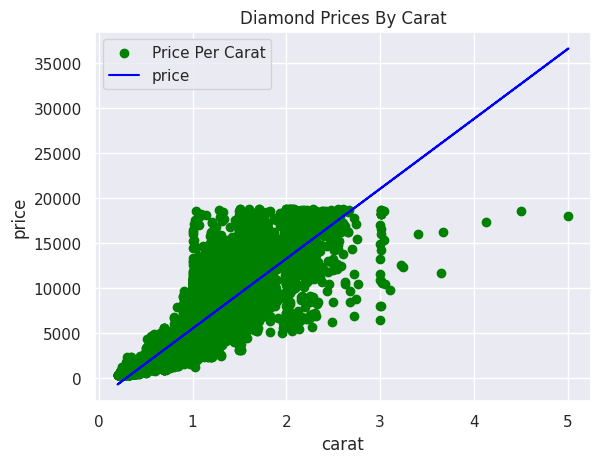

In [149]:
plt.scatter(X_train, Y_train, color = "green", label = "Price Per Carat")
plt.title("Diamond Prices By Carat")
plt.plot(X_train, regressor.predict(X_train), color = "blue", label="price")
plt.xlabel("carat")
plt.ylabel("price")
plt.legend()
plt.show()

In [150]:
y_pred = regressor.predict(X_test)

In [151]:
carat= 1.23
price= regressor.predict ([[carat]])
print(f'Price of a diamond that is {carat} costs about {price}');

Price of a diamond that is 1.23 costs about [7292.42283324]


In [152]:
x = df[['carat', 'cut', 'color', 'clarity']].values
y = df['price'].values

In [153]:
type(x)

numpy.ndarray

In [154]:
type(y)

numpy.ndarray

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

In [156]:
DecisionTree_model = DecisionTreeRegressor()
RandomForest_model = RandomForestRegressor()
LinarRegressor_model = LinearRegression()

In [157]:
models = [DecisionTree_model, RandomForest_model, LinarRegressor_model]
for model in models:
    model.fit(x_train, y_train)
    print(f'{model} is trained!')

DecisionTreeRegressor() is trained!
RandomForestRegressor() is trained!
LinearRegression() is trained!


In [158]:
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_RandomForest = RandomForest_model.score(x_test, y_test)
accuracy_LinarRegressor = LinarRegressor_model.score(x_test, y_test)

In [159]:
models = {'DecisionTree_model': accuracy_DecisionTree, 'RandomForest_model': accuracy_RandomForest, 'LinarRegressor_model': accuracy_LinarRegressor}
for model, score in models.items():
    print(f'The accuracy score for the {model} is {round(score*100, 2)}%')

The accuracy score for the DecisionTree_model is 97.26%
The accuracy score for the RandomForest_model is 97.81%
The accuracy score for the LinarRegressor_model is 86.96%


In [160]:
test_x = np.zeros((1, 4))
test_x

array([[0., 0., 0., 0.]])

In [161]:
test_x[0, 0] =       1.23
test_x[0, 1] =       0
test_x[0, 2] =       1
test_x[0, 3] =   2

In [162]:
test_x

array([[1.23, 0.  , 1.  , 2.  ]])

In [163]:
models = [DecisionTree_model, RandomForest_model, LinarRegressor_model]
for model in models:
    prediction = model.predict(test_x)
    print(f'The model {model} predicts a price of a diamond at ${round(float(prediction[0]), 2)}')

The model DecisionTreeRegressor() predicts a price of a diamond at $7158.0
The model RandomForestRegressor() predicts a price of a diamond at $7122.72
The model LinearRegression() predicts a price of a diamond at $7354.79


In [164]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75


<Axes: xlabel='carat', ylabel='price'>

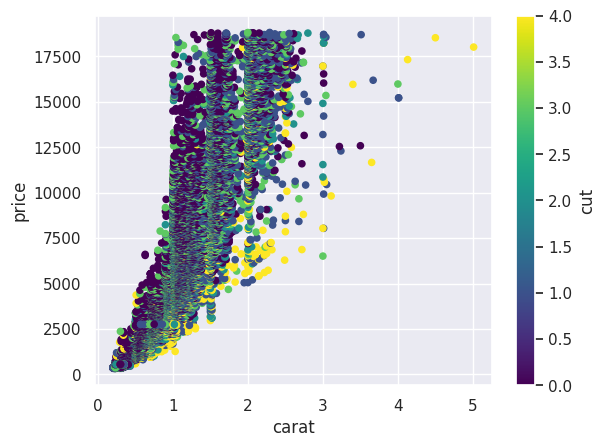

In [165]:
df.plot.scatter(x='carat', y='price', c='cut', cmap='viridis')

In [166]:
x= df ['x']
price= df ['price']

In [167]:
X = np.array(x).reshape(-1,1)
Y= np.array(price)

In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [169]:
regressor.fit(X_train, Y_train)

LinearRegression()

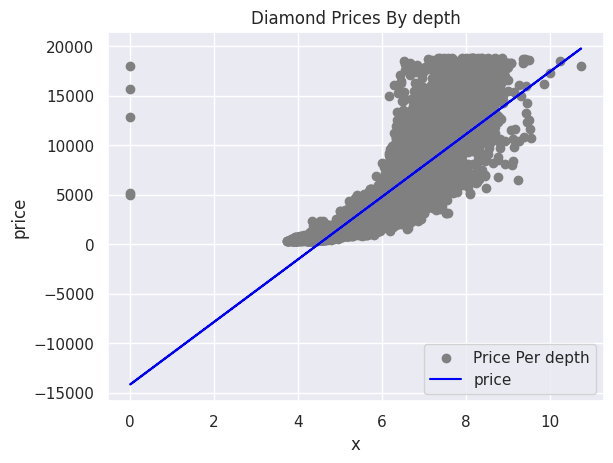

In [170]:
plt.scatter(X_train, Y_train, color = "grey", label = "Price Per depth")
plt.title("Diamond Prices By depth")
plt.plot(X_train, regressor.predict(X_train), color = "blue", label="price")
plt.xlabel("x")
plt.ylabel("price")
plt.legend()
plt.show()

In [179]:
pickle.dump(LinarRegressor_model, open('/content/drive/MyDrive/Colab Notebooks/Projects/Diamond Assignment/models.pkl','wb'))